In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Feature Engineering**

In [124]:
# load the dataset
df = pd.read_csv('D:/PROJECTS/ML Projects/Laptop Price Predictor/data/pre processed/pre_processed.csv')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095


### **Insights**
- The task needed is to extract, create and clean the features in Columns with multiple information.

In [125]:
# begin with Sreen Resolution column
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

### **Insights**
- common thing such as value of resolution should be separates
- Other information is that whether a laptop is touchscreen or not
- Another information is either the laptop has IPS panel or not
- Screen resoultion with respect to X and Y can be separared, This information along with Screen Inches can be used to create a valuable feature like PPI(Pixels per inch)

In [126]:
# Create a touchscreen feature
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [127]:
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [128]:
# create temperory dataframe that stores X and Y resolution of screen in columns 0 and 1 respectively
temp_sr_df = df['ScreenResolution'].str.split('x', n=1, expand= True)

In [129]:
df['X_res'] = temp_sr_df[0]
df['Y_res'] = temp_sr_df[1]
# ensuring
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
1244,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4,256GB SSD,Intel HD Graphics 520,Windows 7,1.54,58607,0,0,Full HD 1920,1080
1184,HP,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,6,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.18,42570,0,1,IPS Panel Full HD 1920,1080
477,Lenovo,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,180GB SSD,Intel HD Graphics 620,Windows 10,1.70,72673,0,0,Full HD 1920,1080
254,Acer,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i3 7130U 2.7GHz,4,256GB SSD,Nvidia GeForce MX130,Windows 10,3.00,37402,0,1,IPS Panel Full HD 1920,1080
461,Acer,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,128GB SSD,Intel HD Graphics 400,Windows 10,1.40,23176,0,0,1366,768


In [130]:
# cleaning the X_res column with regex
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
# ensuring
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
938,Dell,Ultrabook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.36,87325,0,0,1920,1080
270,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.9GHz,8,512GB SSD,Intel Iris Graphics 550,macOS,1.37,104370,0,1,2560,1600
1153,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,1TB HDD,Nvidia GeForce GTX 1050Ti,Windows 10,2.62,63882,0,0,1920,1080
520,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,3.20,74538,0,1,1920,1080
969,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,6,256GB SSD,Nvidia GeForce 920MX,Windows 10,2.40,37029,0,0,1920,1080


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   int64  
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   object 
 14  Y_res             1303 non-null   object 
dtypes: float64(2), int64(4), object(9)
memory usage: 152.8+ KB


In [132]:
# change type to int
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [133]:
# to check the correlation with price, It only tells with numeric features
df.select_dtypes(include=[np.number]).corr()['Price']

Inches         0.068196
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252207
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

### **Insights**
- we can create a PPI featue using inches, X and Y resolution to make it more impactful in model
- To calculate the PPI (pixels per inch) of a laptop screen, you can use the following formula: PPI = diagonal length (in pixels) / screen size (in inches). The diagonal length can be calculated using the Pythagorean Theorem and the screen width and height in pixels

In [134]:
df['PPI'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [135]:
df.drop(columns=['ScreenResolution','Inches','X_res','Y_res'],inplace=True)

In [136]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,226.983005


In [137]:
df.select_dtypes(include=[np.number]).corr()['Price']

Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252207
PPI            0.473487
Name: Price, dtype: float64

In [138]:
# Lets work on cpu columns
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core i5 7200U 2.70GHz        1
Intel Core M M7-6Y75 1.2GHz        1
Intel Core M 6Y54 1.1GHz           1
AMD E-Series 9000 2.2GHz           1
Samsung Cortex A72&A53 2.0GHz      1
Name: count, Length: 118, dtype: int64

### **Insights**
- We need the specific feature of processor
    - 5 catagories can be made: 'Intel Core i7' or 'Intel Core i5' or 'Intel Core i3' or all other intel processors or AMD processors

In [139]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [140]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [141]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [142]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,226.983005,Intel Core i5


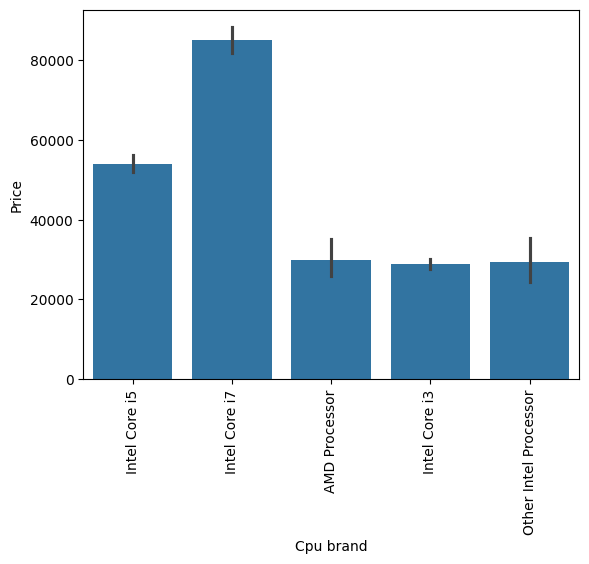

In [143]:
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [144]:
# lets work on memory column now:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                       

In [145]:
# Convert the 'Memory' column to string type and remove '.0' from values
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
# print("After converting to string and removing '.0':")
# print(df['Memory'].sample(5))

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Maaz PC\AppData\Local\Temp\ipykernel_6864\582703422.py:2: SyntaxWarning: invalid escape sequence '\.'
  df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)


In [146]:
# Remove 'GB' and 'TB' units, replacing 'TB' with '000' to convert to GB
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
# print("\nAfter removing 'GB' and replacing 'TB' with '000':")
# print(df['Memory'].sample(5))

In [147]:
# Split the 'Memory' column into two parts based on the '+' delimiter
new = df["Memory"].str.split("+", n=1, expand=True)
print("\nAfter splitting the 'Memory' column:")
print(new.head())


After splitting the 'Memory' column:
                   0     1
0            128 SSD  None
1  128 Flash Storage  None
2            256 SSD  None
3            512 SSD  None
4            256 SSD  None


In [148]:
# Create a new column 'first' with the first part and strip any leading/trailing spaces
df["first"] = new[0].str.strip()
print("\nFirst part after splitting and stripping spaces:")
print(df['first'].head())


First part after splitting and stripping spaces:
0              128 SSD
1    128 Flash Storage
2              256 SSD
3              512 SSD
4              256 SSD
Name: first, dtype: object


In [149]:
# Create a new column 'second' with the second part, fill NaN with "0", and strip spaces
df["second"] = new[1].fillna("0").str.strip()
print("\nSecond part after splitting, filling NaN with '0', and stripping spaces:")
print(df['second'].head())


Second part after splitting, filling NaN with '0', and stripping spaces:
0    0
1    0
2    0
3    0
4    0
Name: second, dtype: object


In [150]:
# Function to extract numeric values from a string
def extract_numeric(value):
    try:
        # Join all digit characters and convert to integer
        return int(''.join(filter(str.isdigit, value)))
    except ValueError:
        # Return 0 if there's no numeric part
        return 0

In [151]:
# Apply the extract_numeric function to 'first' and 'second' columns
df["first"] = df["first"].apply(extract_numeric)
df["second"] = df["second"].apply(extract_numeric)
print("\nAfter extracting numeric values from 'first' and 'second':")
print(df[['first', 'second']].head())


After extracting numeric values from 'first' and 'second':
   first  second
0    128       0
1    128       0
2    256       0
3    512       0
4    256       0


In [152]:
# Create new columns to indicate the presence of different storage types in 'Memory'
df["Layer1HDD"] = df["Memory"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["Memory"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["Memory"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["Memory"].apply(lambda x: 1 if "Flash Storage" in x else 0)
print("\nIndicators for storage types in 'Memory':")
print(df[['Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1Flash_Storage']].head())


Indicators for storage types in 'Memory':
   Layer1HDD  Layer1SSD  Layer1Hybrid  Layer1Flash_Storage
0          0          1             0                    0
1          0          0             0                    1
2          0          1             0                    0
3          0          1             0                    0
4          0          1             0                    0


In [153]:
# Create new columns to indicate the presence of different storage types in 'second'
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in str(x) else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in str(x) else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in str(x) else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in str(x) else 0)
print("\nIndicators for storage types in 'second':")
print(df[['Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', 'Layer2Flash_Storage']].head())


Indicators for storage types in 'second':
   Layer2HDD  Layer2SSD  Layer2Hybrid  Layer2Flash_Storage
0          0          0             0                    0
1          0          0             0                    0
2          0          0             0                    0
3          0          0             0                    0
4          0          0             0                    0


In [154]:
# Calculate total HDD, SSD, Hybrid, and Flash Storage by multiplying 'first' and 'second' with their respective indicators
df["HDD"] = df["first"] * df["Layer1HDD"] + df["second"] * df["Layer2HDD"]
df["SSD"] = df["first"] * df["Layer1SSD"] + df["second"] * df["Layer2SSD"]
df["Hybrid"] = df["first"] * df["Layer1Hybrid"] + df["second"] * df["Layer2Hybrid"]
df["Flash_Storage"] = df["first"] * df["Layer1Flash_Storage"] + df["second"] * df["Layer2Flash_Storage"]
print("\nTotal storage values (HDD, SSD, Hybrid, Flash Storage):")
print(df[['HDD', 'SSD', 'Hybrid', 'Flash_Storage']].head())


Total storage values (HDD, SSD, Hybrid, Flash Storage):
   HDD  SSD  Hybrid  Flash_Storage
0    0  128       0              0
1    0    0       0            128
2    0  256       0              0
3    0  512       0              0
4    0  256       0              0


In [155]:
# Drop intermediate columns used for calculations
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'], inplace=True)
print("\nFinal DataFrame after dropping intermediate columns:")
print(df.head())


Final DataFrame after dropping intermediate columns:
  Company   TypeName  Ram             Memory                           Gpu  \
0   Apple  Ultrabook    8            128 SSD  Intel Iris Plus Graphics 640   
1   Apple  Ultrabook    8  128 Flash Storage        Intel HD Graphics 6000   
2      HP   Notebook    8            256 SSD         Intel HD Graphics 620   
3   Apple  Ultrabook   16            512 SSD            AMD Radeon Pro 455   
4   Apple  Ultrabook    8            256 SSD  Intel Iris Plus Graphics 650   

   OpSys  Weight   Price  Touchscreen  IPS         PPI      Cpu brand  HDD  \
0  macOS    1.37   71378            0    1  226.983005  Intel Core i5    0   
1  macOS    1.34   47895            0    0  127.677940  Intel Core i5    0   
2  No OS    1.86   30636            0    0  141.211998  Intel Core i5    0   
3  macOS    1.83  135195            0    1  220.534624  Intel Core i7    0   
4  macOS    1.37   96095            0    1  226.983005  Intel Core i5    0   

   SSD  

In [156]:
df['Hybrid'].value_counts()

Hybrid
0       1291
1000       9
508        1
512        1
256        1
Name: count, dtype: int64

In [157]:
df.select_dtypes(include=[np.number]).corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS              0.252207
PPI              0.473487
HDD             -0.303622
SSD              0.676202
Hybrid          -0.020186
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [158]:
df.drop(columns=['Memory','Hybrid','Flash_Storage'],inplace=True)

In [159]:
# Lets work on Gpu column
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia Quadro M500M          1
AMD Radeon R7 M360           1
Nvidia Quadro M3000M         1
Nvidia GeForce 960M          1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

- only brand here is giving some information

In [160]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [161]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [162]:
df = df[df['Gpu brand'] != 'ARM']
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

In [163]:
df.drop(columns=['Gpu'],inplace=True)

In [164]:
#  lets begin with Opsys column
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [165]:
def catch_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [166]:
df['OS'] = df['OpSys'].apply(catch_os)
df.drop(columns='OpSys', inplace= True)

In [167]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand,OS
0,Apple,Ultrabook,8,1.37,71378,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


<Axes: xlabel='Weight', ylabel='Count'>

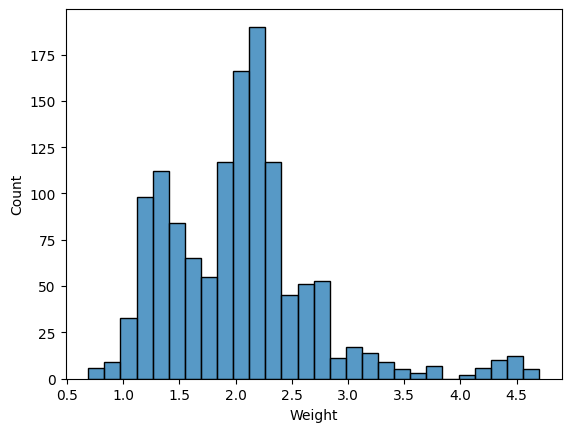

In [168]:
sns.histplot(df['Weight'])

<Axes: xlabel='Price', ylabel='Count'>

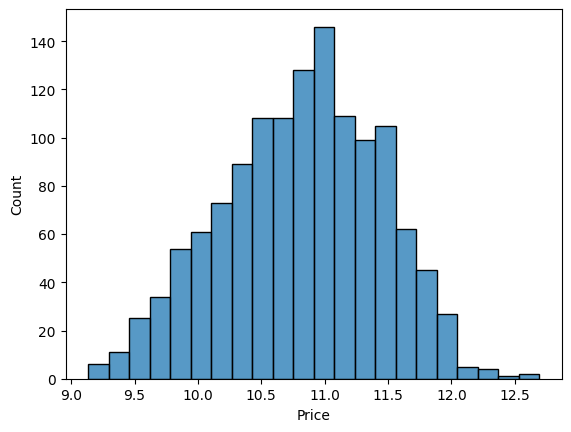

In [169]:
sns.histplot(np.log(df['Price']))

In [170]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'Touchscreen', 'IPS',
       'PPI', 'Cpu brand', 'HDD', 'SSD', 'Gpu brand', 'OS'],
      dtype='object')

In [171]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand,OS
0,Apple,Ultrabook,8,1.37,71378,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [172]:
# saving the processed data
df.to_csv('D:/PROJECTS/ML Projects/Laptop Price Predictor/data/processed/processed_laptop_data.csv',
           index=False)